                                    Name: Abhishek Bhakare
                                        Sub : LP-IV


Problem Statement: 

3. Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data
b. Defining the model’s architecture
c. Training the model
d. Estimating the model’s performance

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings 
warnings.filterwarnings('ignore')

2024-10-07 19:20:07.697404: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-07 19:20:07.904904: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-07 19:20:08.109277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 19:20:08.289486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 19:20:08.342787: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-07 19:20:08.669178: I tensorflow/core/platform/cpu_feature_gu

# loading the Dataset

In [2]:
X_train = np.loadtxt('/home/abhishek/Downloads/Image Classification CNN Keras Dataset-20240807T133249Z-001/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/home/abhishek/Downloads/Image Classification CNN Keras Dataset-20240807T133249Z-001/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/home/abhishek/Downloads/Image Classification CNN Keras Dataset-20240807T133249Z-001/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/home/abhishek/Downloads/Image Classification CNN Keras Dataset-20240807T133249Z-001/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')


 # Reshaping of the Dataset

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

# Displaying the random image from dataset

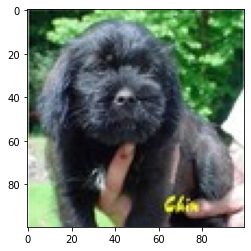

In [4]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Using the Sequential Model of Keras

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# Adding layers

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Optimizing the loss of model using ADAM optimizer

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fitting the model

In [8]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5


2024-09-21 01:33:37.952639: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240000000 exceeds 10% of free system memory.


32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 355ms/step - accuracy: 0.4957 - loss: 0.7649
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - accuracy: 0.5508 - loss: 0.6817
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 345ms/step - accuracy: 0.6695 - loss: 0.6149
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 342ms/step - accuracy: 0.7329 - loss: 0.5537
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 342ms/step - accuracy: 0.7738 - loss: 0.5075


# Evaluating the model

In [9]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6656 - loss: 0.6672


[0.617141604423523, 0.6800000071525574]

# Predicting the output

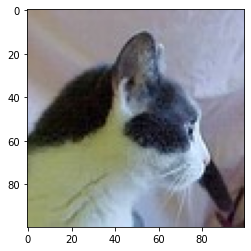

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Model Output is : cat


In [10]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5 #Threshold value

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Model Output is :", pred)